In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, loadtxt,pi,sqrt,log10,log
import math

# Datos de entrada

**Datos de entrada**

In [2]:
#Todos sacados de tablas del Cengel para la Temperatura del suelo
Pr=0.7282
#Viscosidad dinámica [kg/m]
visd=(1.872*pow(10,-5))
#Viscosidad cinemática [m^2/s]
visc=(1.608*pow(10,-5))
#Conductividad térmica [J/mK]
k=0.02588
#Densidad del aire [kg/m^3]
rho=1.164
#Calor específico [J/kgK]
Cp=1007
#Cambios de aire por hora para el espacio 
ca=6
#Diámetro interno del tubo [m]
di=0.045
#Temperatura media mensual en el lugar seleccionado [°C]
Tw=25
#Volumen del espacio a climatizar
volumen=48

# Metodología para la resolución del problema

**Flujo volumétrico [m^3/s]**

In [3]:
V_dot=(volumen*ca)/3600
V_dot

0.08

**Velocidad del aire [m/s]**

In [4]:
vel=(4*V_dot)/(pi*di**2)
vel

50.3008215204015

**Reynolds**

In [5]:
Re=(vel*di)/visc
Re

140767.22440410865

**xi**

In [6]:
xi= pow(((1.82*log10(Re)-1.64)),-2)
xi

0.016734408160310653

**Nu**

In [7]:
Nu = ((xi/8)*(Re-1000)*Pr)/(1+(12.7*sqrt((xi/8))*(pow(Pr,2/3)-1)))
Nu

239.40372337005715

**h**

In [8]:
h=(Nu*k)/di
h

137.68374135149065

**Flujo másico [kg/s]**

In [9]:
m=V_dot*rho
m

0.09312

**DATOS CHINGONES**

Usando una efectividad de 0.4, el NTU es 0.5108256237659907 y la longitud del tubo es: 2.460934567288525 m


Usando una efectividad de 0.5, el NTU es 0.6931471805599453 y la longitud del tubo es: 3.339280132979337 m


Usando una efectividad de 0.6, el NTU es 0.916290731874155 y la longitud del tubo es: 4.414288224484592 m


Usando una efectividad de 0.7, el NTU es 1.203972804325936 y la longitud del tubo es: 5.800214700267861 m


Usando una efectividad de 0.8, el NTU es 1.6094379124341005 y la longitud del tubo es: 7.753568357463929 m


Usando una efectividad de 0.9, el NTU es 2.302585092994046 y la longitud del tubo es: 11.092848490443265 m


Usando una efectividad de 0.95, el NTU es 2.99573227355399 y la longitud del tubo es: 14.4321286234226 m


Usando una efectividad de 0.999, el NTU es 6.907755278982136 y la longitud del tubo es: 33.27854547132979 m




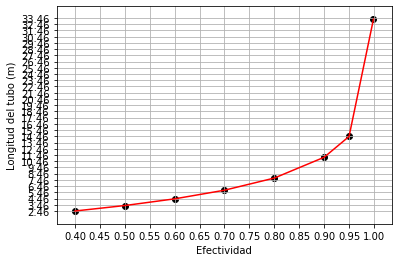

In [10]:
epsilon = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95,0.999] #Efectividad
longitud = []
i = 0
for i in epsilon:
    NTU = -log(1-i)
    L=(NTU*Cp*V_dot*rho)/(Nu*pi*k)
    longitud.append(L)
    print(f"Usando una efectividad de {i}, el NTU es {NTU} y la longitud del tubo es: {L} m")
    print("\n")
plt.plot(epsilon,longitud, color="red")
plt.scatter(epsilon,longitud, color="black")
plt.xticks(np.arange(min(epsilon),max(epsilon)+0.05,0.05))
plt.yticks(np.arange(min(longitud),max(longitud)+1,1))
plt.grid()
plt.xlabel("Efectividad")
plt.ylabel("Longitud del tubo (m)")
plt.show()

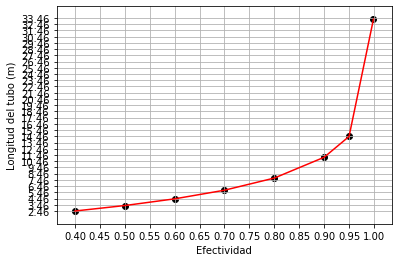

In [11]:
epsilon = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95,0.999] #Efectividad

longitud = list(((-log(1-i))*Cp*V_dot*rho)/(Nu*pi*k) for i in epsilon)
plt.plot(epsilon,longitud, color="red")
plt.scatter(epsilon,longitud, color="black")
plt.xticks(np.arange(min(epsilon),max(epsilon)+0.05,0.05))
plt.yticks(np.arange(min(longitud),max(longitud)+1,1))
plt.grid()
plt.xlabel("Efectividad")
plt.ylabel("Longitud del tubo (m)")
plt.show()

In [12]:
print(longitud)

[2.460934567288525, 3.339280132979337, 4.414288224484592, 5.800214700267861, 7.753568357463929, 11.092848490443265, 14.4321286234226, 33.27854547132979]


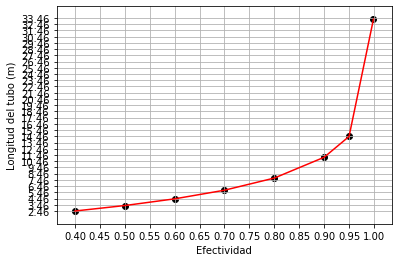

In [13]:
epsilon = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95,0.999] #Efectividad

longitud = list(map(lambda i :(-log(1-i)*Cp*V_dot*rho)/(Nu*pi*k), epsilon))
plt.plot(epsilon,longitud, color="red")
plt.scatter(epsilon,longitud, color="black")
plt.xticks(np.arange(min(epsilon),max(epsilon)+0.05,0.05))
plt.yticks(np.arange(min(longitud),max(longitud)+1,1))
plt.grid()
plt.xlabel("Efectividad")
plt.ylabel("Longitud del tubo (m)")
plt.show()

In [14]:
y = list(map(lambda i: i * 0.01, range(1,101)))

In [15]:
w = [i * 0.01 for i in range(1,101)]

In [16]:
lista11 = []
for i in range(1,100):
    if i%2 == 0:
        lista11.append(i)
print(lista11)


lista111 = list(filter(lambda i: i%2 == 0, range(1,100))) 
print(lista111)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


In [21]:
def func(s):
    s = s.lower().split()
    total = 0
    for i in s: 
        if i == "dog":
            total = total + 1
    return total

func("Dog dog are dog us dog")

4

In [22]:
4+4

8

In [23]:
np.arange(1,11,0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])

In [28]:
LIST = [1,2,4]
arr = np.array(LIST)
arr

array([1, 2, 4])